# Exploring  DALEX (moDel Agnostic Language for Exploration and eXplanation) for XAI
## CHAPTER 09 - *Other popular XAI frameworks*

From **Applied Machine Learning Explainability Techniques** by [**Aditya Bhattacharya**](https://www.linkedin.com/in/aditya-bhattacharya-b59155b6/), published by **Packt**

### Objective

In this notebook, we will explore the application of the popular XAI framework of DALEX (moDel Agnostic Language for Exploration and eXplanation). I high recommend you to go through the DALEX GitHub project site: https://github.com/ModelOriented/DALEX and DALEX e-book - https://pbiecek.github.io/ema/. The DALEX package is a part of [DrWhy.AI universe](http://drwhy.ai/).

### Installing the modules

Install the following libraries in Google Colab or your local environment, if not already installed.

In [ ]:
!pip install --upgrade pandas numpy matplotlib seaborn scikit-learn dalex

### Loading the modules

In [28]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import dalex as dx 

import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display

np.random.seed(123)

### About the data

**FIFA Club Position Prediction dataset - [FIFA Club Position Prediction dataset](https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/tree/main/Chapter09/datasets)**

In this tutorial we will use the FIFA Club Position Prediction dataset used for the [Explainerdashboard Tutorial](https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/blob/main/Chapter09/Explainer_dashboard_example.ipynb) and for the [H2O AutoML Expainer Tutorial](https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/blob/main/Chapter09/H2o_AutoML_explain_example.ipynb). But instead of using this dataset to predict the league position of a particular club based on its player's abilities, we will try to predict the valuation of a player based on its skills and abilities. So, this will be a regression problem and we will use DALEX to explain the Regression ML model.

### Loading the data

In [104]:
# We will read the training data
df_train = pd.read_csv('datasets/fifa_league_21_train.csv')

In [105]:
df_train.head()

,short_name,overall,potential,value_eur,wage_eur,age,club_name,league_name,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,rb,lcb,cb,rcb,gk,position
0,L. Messi,93,93,103500000.0,560000.0,33,FC Barcelona,Spain Primera Division,CAM,Left,4,4,5,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,NaN,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,65,55,55,55,22,3
1,Cristiano Ronaldo,92,92,63000000.0,220000.0,35,Juventus,Italian Serie A,LS,Right,4,5,5,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,28,32,24,7,11,15,14,11,NaN,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,64,57,57,57,23,4
2,R. Lewandowski,91,91,111000000.0,240000.0,31,FC Bayern München,German 1. Bundesliga,ST,Right,4,4,4,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,35,42,19,15,6,12,8,10,NaN,91,91,91,85,87,87,87,85,88,88,88,86,82,82,82,86,67,68,68,68,67,64,64,63,63,63,22,1
3,Neymar Jr,91,91,132000000.0,270000.0,28,Paris Saint-Germain,French Ligue 1,LW,Right,5,5,5,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,35,30,29,9,9,15,15,11,NaN,87,87,87,90,89,89,89,90,91,91,91,91,86,86,86,91,70,65,65,65,70,65,65,52,52,52,23,2
4,K. De Bruyne,91,91,129000000.0,370000.0,29,Manchester City,English Premier League,RCM,Right,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,76,66,88,94,84,91,68,65,53,15,13,5,10,13,NaN,86,86,86,88,88,88,88,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,78,72,72,72,24,1


In [6]:
# Reading the dataset description
with open('datasets/data_description.txt') as f:
    contents = f.read()
    print(contents)

-------------------------------------
FIFA Club Position Prediction dataset.
--------------------------------------
The dataset is prepared from the Kaggle Fifa 22 Player dataset: https://www.kaggle.com/stefanoleone992/fifa-22-complete-player-dataset. Original dataset acknowledgement is provided to the website sofifa.com as the data is scrapped from the publicly available website.

The training data is for top 10 clubs for the 2020-21 season from English Premier League, La Liga, Serie A, Bundesliga 1, French League 1.

The test data is unlabeled and contains the player information of the same teams for 2021-2022 season.

The datasets contains the following features:

- Players available in FIFA 21, and also FIFA 22 for the selected clubs and leagues

- 80+ attributes

- The club `position` is the target variable that the model needs to predict.

- Player positions, with the role in the club

- Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.



In [7]:
# Check dataset dimensions
print(df_train.shape)

(1584, 82)


In [8]:
df_train.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'club_name', 'league_name', 'club_position', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   1584 non-null   object 
 1   overall                      1584 non-null   int64  
 2   potential                    1584 non-null   int64  
 3   value_eur                    1583 non-null   float64
 4   wage_eur                     1584 non-null   float64
 5   age                          1584 non-null   int64  
 6   club_name                    1584 non-null   object 
 7   league_name                  1584 non-null   object 
 8   club_position                1584 non-null   object 
 9   preferred_foot               1584 non-null   object 
 10  weak_foot                    1584 non-null   int64  
 11  skill_moves                  1584 non-null   int64  
 12  international_reputation     1584 non-null   int64  
 13  pace              

As we can see, the dataset contains close to 81 features, out of which input values we will keep only information about player's skills and abilities at different playing position along with the `age` of the player for prediction of the valuation of the player. `Age` will be an interesting feature as usually younger players have much higher valuation because of their growing potential. We will drop other features for this particular analysis. So, let's begin!

### Data Pre-processing

In [10]:
# Drop un-necessary features
features_to_drop = ['short_name', 'club_name', 'league_name', 'preferred_foot', 'wage_eur', 'club_position', 'position']
target_variable = 'value_eur'

In [11]:
df_train.drop(columns=features_to_drop, inplace=True)

In [12]:
print(df_train.shape)

(1584, 75)


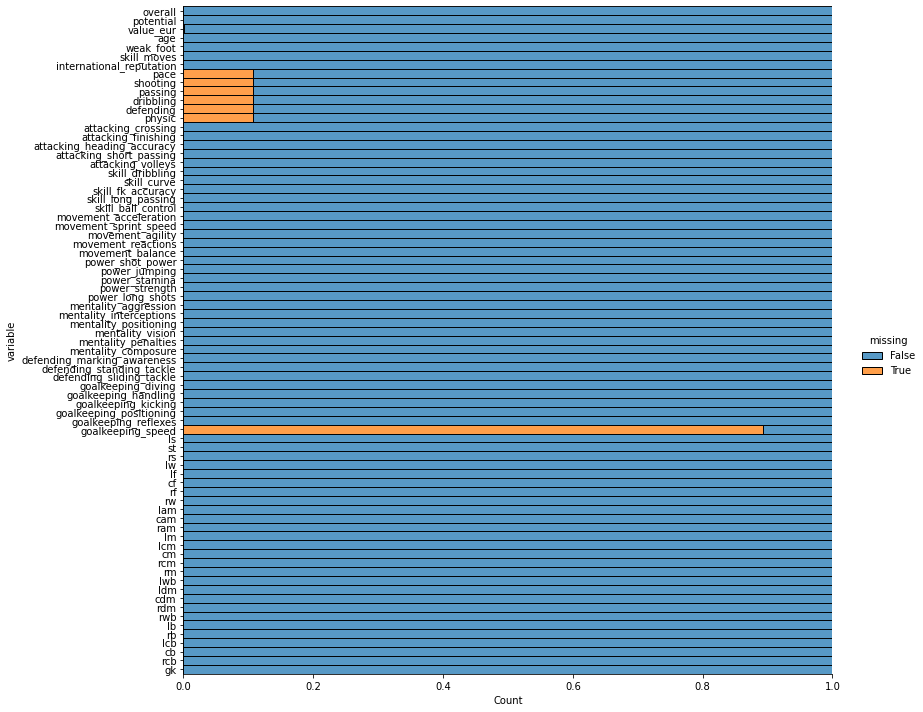

In [13]:
# Let's check missing values

sns.displot(
    data=df_train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=10,
    aspect=1.2
)
plt.show()

As we analyze the missing values, we can see that goalkeeping speed has high percentage of missing values. Hence we can also drop the feature. But for the other missing values related to pace, shooting, passing, dribbling, defending and physic, mostly this data is not available for goal keepers. So, instead of dropping the records related to goal keepers, we will keep a constant value of 40 for all the goal keepers, as the intuitively thinking since these goal keepers are professional players, almost all of them would have a score of atleast 40. There is one missing value under value_eur. It is highly possible that the player has decided to retire and hence no value is assigned. So, we will just drop this record as an outlier.

In [14]:
# dropping the feature 'goalkeeping_speed'
df_train.drop(columns=['goalkeeping_speed'], inplace=True)

In [15]:
# data imputation for the features 'pace', 'shooting', 'passing', 'dribbling', 'defending' and 'physic' with a constant value of 40
for features in ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']:
    df_train[features].fillna(40, inplace=True)

In [16]:
# Consider all other missing values as outliers, so just drop them
df_train.dropna(inplace=True)

In [17]:
# Let's separate the labels from training data
labels = df_train[target_variable]
df_train.drop(columns=[target_variable], inplace=True)

In [18]:
print(df_train.shape)

(1583, 73)


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583 entries, 0 to 1583
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      1583 non-null   int64  
 1   potential                    1583 non-null   int64  
 2   age                          1583 non-null   int64  
 3   weak_foot                    1583 non-null   int64  
 4   skill_moves                  1583 non-null   int64  
 5   international_reputation     1583 non-null   int64  
 6   pace                         1583 non-null   float64
 7   shooting                     1583 non-null   float64
 8   passing                      1583 non-null   float64
 9   dribbling                    1583 non-null   float64
 10  defending                    1583 non-null   float64
 11  physic                       1583 non-null   float64
 12  attacking_crossing           1583 non-null   int64  
 13  attacking_finishin

In [20]:
df_train.describe()

,overall,potential,age,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,rb,lcb,cb,rcb,gk
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,73.734681,79.324700,24.907138,3.118762,2.732154,1.513582,66.998737,57.435881,63.022742,67.363866,56.610234,64.701832,57.180670,51.972836,57.411876,67.205306,49.363234,63.965888,55.857233,48.341756,60.979154,67.006949,67.050537,67.173089,66.701200,70.781428,66.026532,65.702464,66.627922,65.884397,66.926721,54.065698,61.503474,53.308275,57.042956,61.941251,52.694251,67.384081,53.367025,54.289956,51.726469,16.958939,16.698042,16.543272,16.833860,17.230575,63.322173,63.322173,63.322173,62.700569,62.799116,62.799116,62.799116,62.700569,65.315224,65.315224,65.315224,65.477574,64.916614,64.916614,64.916614,65.477574,62.720152,62.756791,62.756791,62.756791,62.720152,61.833228,61.833228,60.468730,60.468730,60.468730,24.924826
std,7.622434,5.306837,4.549166,0.685627,0.945558,0.804325,13.966096,15.596671,12.974281,13.470115,18.313579,12.832019,20.585248,21.894469,19.461971,15.653289,20.289064,20.537348,20.825470,19.738719,16.095525,18.286125,14.604866,14.304185,14.198958,9.806483,14.550294,13.425094,12.048990,16.031414,12.343777,21.490438,18.260991,23.486359,22.200345,15.310762,17.080164,12.527908,22.552142,24.205503,24.019384,19.864527,18.995203,18.492879,19.350668,20.292346,14.915389,14.915389,14.915389,16.161403,15.720861,15.720861,15.720861,16.161403,15.483928,15.483928,15.483928,15.543035,14.841280,14.841280,14.841280,15.543035,15.423254,15.608504,15.608504,15.608504,15.423254,15.750865,15.750865,16.741286,16.741286,16.741286,17.113735
min,49.000000,60.000000,16.000000,1.000000,1.000000,1.000000,30.000000,22.000000,31.000000,33.000000,16.000000,35.000000,7.000000,5.000000,8.000000,11.000000,4.000000,6.000000,7.000000,5.000000,11.000000,10.000000,13.000000,15.000000,20.000000,35.000000,22.000000,24.000000,31.000000,16.000000,24.000000,5.000000,11.000000,6.000000,4.000000,14.000000,8.000000,23.000000,5.000000,7.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,21.000000,21.000000,21.000000,17.000000,18.000000,18.000000,18.000000,17.000000,21.000000,21.000000,21.000000,20.000000,21.000000,21.000000,21.000000,20.000000,18.000000,21.000000,21.000000,21.000000,18.000000,18.000000,18.000000,20.000000,20.000000,20.000000,11.000000
25%,68.000000,76.000000,21.000000,3.000000,2.000000,1.000000,

After keeping the necessary features, we see that we have only numerical features and hence we do not need to perform any one-hot encoding as there is no categorical features unlike the  [Explainerdashboard Tutorial](https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/blob/main/Chapter09/Explainer_dashboard_example.ipynb) and the [H2O AutoML Expainer Tutorial](https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/blob/main/Chapter09/H2o_AutoML_explain_example.ipynb). Data Scaling or normalization would have definitely helped, but we will skip that for this tutorial as our interest is in the model explainability and not getting a highly efficient model. But you can try it out yourself! Also you can perform outlier detection and removal and further advanced feature engineering to get a better model, but we will skip these steps for this tutorial!

### Training the model

For this tutorial we will use a model trained on `RandomForestRegressor` algorithm will minimal hyper-parameter tuning as our black-box model. But please feel free to explore more algorithms or different hyper-parameter tuning settings.

In [23]:
x_train,x_valid,y_train,y_valid = train_test_split(df_train,labels,test_size=0.2,random_state=123)

In [75]:
model = RandomForestRegressor(n_estimators=790, min_samples_split = 3, random_state=123).fit(x_train, y_train)

In [76]:
y_pred = model.predict(x_valid)
print('R^2 score is:')
r2_score(y_valid, y_pred)

R^2 score is:


0.9362439187667068

In [77]:
model.score(x_valid, y_valid) # 790 best so far, mss = 3 - 0.9364

0.9362439187667068

$R^2$ score of 93.6% seems to be very good. Now, let's check this on the unseen test data from 2022-2023 season.

### Model evaluation on unseen data

In [99]:
df_test = pd.read_csv('datasets/fifa_league_22_test.csv')

def predict_player_valuation(df_test, model, player_name):
    '''
    Predict club position from player quality
    '''
    
    df_test = df_test[df_test['short_name'] == player_name]
    display.display(df_test)
    print(f'Original Valuation for the 2022-2023 season for {player_name} is EUR. {df_test[target_variable].values[0]}')
    df_test.drop(columns=['short_name', 
                          'club_name', 
                          'league_name', 
                          'preferred_foot', 
                          'wage_eur', 
                          'club_position'], inplace=True)
    df_test.drop(columns=['goalkeeping_speed'], inplace=True)
    df_test.drop(columns=[target_variable], inplace=True)
    for features in ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']:
            df_test[features].fillna(40, inplace=True)
    
    pred = model.predict(df_test)
    print(f'Predicted Valuation for the 2022-2023 season for {player_name} is EUR. {round(pred[0], 1)}')

Now, let's apply the model for a young and promising player `Jadon Sancho` who has joined `Manchester United` from `Borussia Dortmund` for the `2022-2023` season for a whooping 85M EUR. 

In [108]:
predict_player_valuation(df_test, model, player_name = 'J. Sancho')

,short_name,overall,potential,value_eur,wage_eur,age,club_name,league_name,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,rb,lcb,cb,rcb,gk
45,J. Sancho,87,91,116500000.0,150000.0,21,Manchester United,English Premier League,LM,Right,3,5,3,81.0,76.0,82.0,91.0,36.0,65.0,82,83,38,87,83,92,84,65,70,90,85,78,91,85,90,73,51,77,68,65,44,39,83,87,62,86,32,39,32,7,11,10,11,13,NaN,81,81,81,85,84,84,84,85,88,88,88,88,82,82,82,88,69,65,65,65,69,63,63,51,51,51,22


Original Valuation for the 2022-2023 season for J. Sancho is EUR. 116500000.0
Predicted Valuation for the 2022-2023 season for J. Sancho is EUR. 112242909.9


Interestingly the model was very close! The original valuation in Euros for `Jadon Sancho` was around 116M EUR, but the model predicted it to be 112.25M EUR which is quite close! Now, let's try DALEX for model explainability and decipher why the model was prediction was close!

### Model Explainability using DALEX

- doc string

In [109]:
# Create DALEX Explainer object 
explainer = dx.Explainer(model, 
                         x_valid, y_valid, 
                         model_type = 'regression',
                         label='Random Forest')

Preparation of a new explainer is initiated

  -> data              : 317 rows 73 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 317 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Random Forest
  -> predict function  : <function yhat_default at 0x0000022801C365E8> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.83e+05, mean = 1.35e+07, max = 1.07e+08
  -> model type        : regression will be used
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -4.17e+07, mean = -5.39e+05, max = 1.08e+07
  -> model_info        : package sklearn

A new explainer has been created!


In [110]:
# Model Level Explanation

In [113]:
model_performance = explainer.model_performance("regression")
display.display(model_performance.result)

,mse,rmse,r2,mae,mad
Random Forest,1.766635e+13,4.203136e+06,0.936244,1.313286e+06,272801.687764


In [114]:
# Feature Importance

In [146]:
variable_groups = {
    'international_reputation' : ['international_reputation'],
    'age': ['age'],
    'attacking': ['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys'],
    'skill': ['skill_dribbling', 'skill_moves',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control'],
    'movement': ['movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance'],
    'power': ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots'],
    'mentality': ['mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure'],
    'defending': ['defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle'],
    'goalkeeping' : ['goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'],
    'abilities': ['overall', 'potential', 'pace', 'shooting', 
                  'passing','dribbling','defending','physic', 'weak_foot'],
}

In [149]:
Var_Importance = explainer.model_parts(variable_groups=variable_groups, B=15, random_state=123)
Var_Importance.plot(max_vars=10, 
                    rounding_function=np.rint, 
                    digits=None, 
                    vertical_spacing=0.15,
                    title = 'Feature Importance' )

In [150]:
# Partial Dependence Plots

In [155]:
pdp = explainer.model_profile(type = 'partial', N=800)

pdp.plot(variables = ['mentality_aggression', 'power_stamina',
                       'age', 'skill_ball_control'])

Calculating ceteris paribus: 100%|███████████████████████████████████████████| 73/73 [01:15<00:00,  1.03s/it]


In [ ]:
# Accumulated Local Dependence Profile

In [154]:
ald = explainer.model_profile(type = 'accumulated', N=800)

ald.plot(variables = ['age', 'movement_reactions'])

Calculating accumulated dependency: 100%|████████████████████████████████████| 73/73 [00:08<00:00,  8.82it/s]


In [ ]:
# Predict-level explanations

In [157]:
va = {'ibd':[], 'sh':[]}

for name in df_test['short_name'].values[0:3]:
    player = df_test[df_test['short_name'] == name].copy()
    player.drop(columns=['short_name', 
                          'club_name', 
                          'league_name', 
                          'preferred_foot', 
                          'wage_eur', 
                          'club_position'], inplace=True)
    player.drop(columns=['goalkeeping_speed'], inplace=True)
    player.drop(columns=[target_variable], inplace=True)
    for features in ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']:
            player[features].fillna(40, inplace=True)
            
    ibd = explainer.predict_parts(player, type='break_down_interactions', label=name)
    sh = explainer.predict_parts(player, type='shap', B=10, label=name)
    
    va['ibd'].append(ibd)
    va['sh'].append(sh)

In [ ]:
# break_down_interactions

In [158]:
va['ibd'][0].plot(va['ibd'][1:3],
                  rounding_function=lambda x, digits: np.rint(x, digits).astype(np.int),
                  digits=None, max_vars=10)

In [ ]:
# shap

In [160]:
va['sh'][0].plot(va['sh'][1:3],
                 rounding_function=lambda x, digits: np.rint(x, digits).astype(np.int),
                 digits=None, max_vars=10)

In [ ]:
# Ceteris Paribus Profiles

In [163]:
ceteris_paribus_profile = explainer.predict_profile(player,
                               variables=['age', 'movement_reactions'],
                               label=name) # variables to calculate 

ceteris_paribus_profile.plot(size=3, title= f"What If? {name}") # larger width of the line and dot size & change title

Calculating ceteris paribus: 100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 15.33it/s]


In [ ]:
# Model Fairness check

In [ ]:
# https://dalex.drwhy.ai/python-dalex-fairness.html

In [ ]:
# Aspect and Arena from Dalex

In [ ]:
# https://dalex.drwhy.ai/python-dalex-arena.html

In [ ]:
# https://dalex.drwhy.ai/python-dalex-aspect.html

- description

## Final Thoughts

- description

## Reference

1. Dataset link - [FIFA Club Position Prediction Dataset](https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/tree/main/Chapter09/datasets)
2. DALEX Github project - https://github.com/ModelOriented/DALEX
3. Explanatory Model Analysis ebook -https://ema.drwhy.ai/
4. dalex: Responsible Machine Learning with Interactive Explainability and Fairness in Python- http://jmlr.org/papers/v22/20-1473.html
5. DALEX Resources - https://pbiecek.github.io/ema/
6. DrWhy.AI Universe - https://github.com/ModelOriented/DrWhy/blob/master/README.md
7. Other notebook examples: https://dalex.drwhy.ai/python-dalex-fifa.html
8. Some of the utility functions and code are taken from the GitHub Repository of the author - Aditya Bhattacharya https://github.com/adib0073
9. Want to connect with the author of this chapter? You can reach out by any means mentioned here: https://aditya-bhattacharya.net/contact-me/